In [3]:
import os, sys
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()
from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFE

from numpy import set_printoptions
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB



In [6]:
exps_dir = "../../exps"
if os.path.exists(exps_dir) == False: # tạo thư mục (nếu chưa có)
  os.makedirs(exps_dir, exist_ok=True)

save_dir = f"{exps_dir}/feature1"
os.makedirs(save_dir, exist_ok=True)
test_size=0.33
seed=42


# 5. Xây dựng và đánh giá mô hình học sâu Neutual Network

In [26]:
x_train=pd.read_excel(f'{save_dir}/x_train.xlsx')
y_train=pd.read_excel(f'{save_dir}/y_train.xlsx')
x_test=pd.read_excel(f'{save_dir}/x_test.xlsx')
y_test=pd.read_excel(f'{save_dir}/y_test.xlsx')
class_weights_dict=dict(np.load(f'{exps_dir}/feature1/class_weights_dict.npz',allow_pickle=True))['class_weights_dict']
class_weights_dict = {key: value for key, value in class_weights_dict.item().items()}
class_weights_dict

{0: 0.6325301204819277, 1: 2.3863636363636362}

In [27]:
model = Sequential()

model.add(Dense(units=240,activation='relu'))
Dropout(0.5)
model.add(Dense(units=120,activation='relu'))
Dropout(0.5)
model.add(Dense(units=60,activation='relu'))
Dropout(0.5)
model.add(Dense(units=30,activation='relu'))
Dropout(0.5)
model.add(Dense(units=15,activation='relu'))
Dropout(0.5)


model.add(Dense(units=1,activation='sigmoid'))
Dropout(0.5)

# For a binary classification problem

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [29]:

earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)
early_stopping = EarlyStopping(monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=0.00001,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]
checkpointer = ModelCheckpoint(filepath = "Emotion_weights.hdf5", verbose = 1, save_best_only=True)

model.fit(x=x_train,y=y_train,
          validation_data=(x_test,y_test),class_weight=class_weights_dict ,
          batch_size=128,epochs=600,callbacks=[checkpointer, earlystopping])



Epoch 1/600
1/5 [=====>........................] - ETA: 1s - loss: 61.6374 - accuracy: 0.2891
Epoch 1: val_loss improved from inf to 2.21842, saving model to Emotion_weights.hdf5
5/5 [==============================] - 1s 250ms/step - loss: 32.5550 - accuracy: 0.5467 - val_loss: 2.2184 - val_accuracy: 0.7165
Epoch 2/600
1/5 [=====>........................] - ETA: 0s - loss: 4.8516 - accuracy: 0.7266
Epoch 2: val_loss improved from 2.21842 to 1.13668, saving model to Emotion_weights.hdf5
5/5 [==============================] - 0s 19ms/step - loss: 17.9452 - accuracy: 0.3200 - val_loss: 1.1367 - val_accuracy: 0.5394
Epoch 3/600
1/5 [=====>........................] - ETA: 0s - loss: 3.1391 - accuracy: 0.6953
Epoch 3: val_loss did not improve from 1.13668
5/5 [==============================] - 0s 11ms/step - loss: 3.4179 - accuracy: 0.6038 - val_loss: 4.1428 - val_accuracy: 0.2835
Epoch 4/600
1/5 [=====>........................] - ETA: 0s - loss: 2.0328 - accuracy: 0.2656
Epoch 4: val_loss d

Epoch 31/600
1/5 [=====>........................] - ETA: 0s - loss: 0.8670 - accuracy: 0.8281
Epoch 31: val_loss did not improve from 0.61083
5/5 [==============================] - 0s 13ms/step - loss: 0.8895 - accuracy: 0.5410 - val_loss: 1.9771 - val_accuracy: 0.2835
Epoch 32/600
1/5 [=====>........................] - ETA: 0s - loss: 1.5828 - accuracy: 0.1875
Epoch 32: val_loss did not improve from 0.61083
5/5 [==============================] - 0s 12ms/step - loss: 1.3473 - accuracy: 0.5181 - val_loss: 4.5682 - val_accuracy: 0.2835
Epoch 33/600
1/5 [=====>........................] - ETA: 0s - loss: 3.1042 - accuracy: 0.2500
Epoch 33: val_loss improved from 0.61083 to 0.60799, saving model to Emotion_weights.hdf5
5/5 [==============================] - 0s 21ms/step - loss: 2.1532 - accuracy: 0.5352 - val_loss: 0.6080 - val_accuracy: 0.7126
Epoch 34/600
1/5 [=====>........................] - ETA: 0s - loss: 0.7026 - accuracy: 0.7812
Epoch 34: val_loss improved from 0.60799 to 0.60532, s

Epoch 61/600
1/5 [=====>........................] - ETA: 0s - loss: 0.7106 - accuracy: 0.8047
Epoch 61: val_loss did not improve from 0.58559
5/5 [==============================] - 0s 8ms/step - loss: 1.4833 - accuracy: 0.3695 - val_loss: 1.1379 - val_accuracy: 0.7165
Epoch 62/600
1/5 [=====>........................] - ETA: 0s - loss: 1.5319 - accuracy: 0.8281
Epoch 62: val_loss did not improve from 0.58559
5/5 [==============================] - 0s 8ms/step - loss: 1.4947 - accuracy: 0.6476 - val_loss: 1.9747 - val_accuracy: 0.2835
Epoch 63/600
1/5 [=====>........................] - ETA: 0s - loss: 1.5206 - accuracy: 0.1953
Epoch 63: val_loss did not improve from 0.58559
5/5 [==============================] - 0s 8ms/step - loss: 1.2516 - accuracy: 0.5448 - val_loss: 0.7355 - val_accuracy: 0.4291
Epoch 64/600
1/5 [=====>........................] - ETA: 0s - loss: 0.6754 - accuracy: 0.3828
Epoch 64: val_loss did not improve from 0.58559
5/5 [==============================] - 0s 8ms/step 

<Axes: >

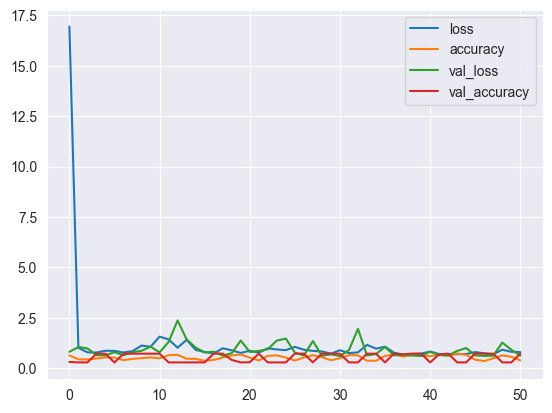

In [20]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [21]:
probabilities = model.predict(x_test)
predictions = np.argmax(probabilities, axis=-1)
model.evaluate(X_test_unsupervised,Y_test_unsupervised)

8/8 [==============================] - 0s 1ms/step - loss: 0.6129 - accuracy: 0.7165


[0.6128929257392883, 0.7165354490280151]

In [30]:
model.evaluate(x_test,y_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

8/8 [==============================] - 0s 1ms/step - loss: 0.7306 - accuracy: 0.4409
              precision    recall  f1-score   support

           0       0.72      1.00      0.83       182
           1       0.00      0.00      0.00        72

    accuracy                           0.72       254
   macro avg       0.36      0.50      0.42       254
weighted avg       0.51      0.72      0.60       254

[[182   0]
 [ 72   0]]


### Kết luận:
- Nhóm xây dựng một mạng Netual network ứng dụng kỹ thuật trong học sâu như callbacks, đánh trọng số,.... Nhưng không khắc phục được tình trạng (imbalanced variable).

In [78]:
def check_result(prediction):
    if isinstance(prediction, (np.ndarray, pd.Series)):
        prediction = prediction.item()  # Hoặc sử dụng prediction[0] hoặc prediction.iloc[0]
    if prediction==1:
        return "Y"
    else:
        return "N"

In [79]:
def check_output(stt,model, X_test, Y_test):
    print(f"Lần thứ {stt}: ")
    indx = rd.randint(0, X_test.shape[0] - 1)  # Đảm bảo indx nằm trong giới hạn của DataFrame
    sample = X_test.iloc[indx, :].values        # Chuyển DataFrame thành mảng NumPy
    sample = np.expand_dims(sample, axis=0)     # Mở rộng kích thước cho phù hợp với mô hình
    y_predict = model.predict(sample)
    print(y_predict)
    Y_check = check_result(Y_test.iloc[indx])
    print('True:', Y_check)
    print('Predicted:', check_result(y_predict))
    print("----------------------------")
    if Y_check==check_result(y_predict):
        return True
    else: return False
    
    

In [80]:
solandung=0
for indx in range(len(x_test)):
    sample = x_test.iloc[indx, :].values        # Chuyển DataFrame thành mảng NumPy
    sample = np.expand_dims(sample, axis=0)     # Mở rộng kích thước cho phù hợp với mô hình
    y_predict = model.predict(sample)
    #print(y_predict[0][0])
    Y_check = check_result(y_test.iloc[indx])
    print('True:', Y_check)
    print('Predicted:', check_result(y_predict))
    print("----------------------------")
    if Y_check==check_result(y_predict):
        solandung+=1
    

1/1 [==============================] - 0s 22ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 24ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 24ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 24ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 16ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 16ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 16ms/step
True: Y
Predicted: N
----------------------------
1/1 [==============================] - 0s 17ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 24ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 16ms/step
True: N
Predicted: N
---------

1/1 [==============================] - 0s 19ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 17ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 24ms/step
True: Y
Predicted: N
----------------------------
1/1 [==============================] - 0s 17ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 14ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 16ms/step
True: Y
Predicted: N
----------------------------
1/1 [==============================] - 0s 18ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 16ms/step
True: Y
Predicted: N
----------------------------
1/1 [==============================] - 0s 16ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 20ms/step
True: N
Predicted: N
---------

1/1 [==============================] - 0s 19ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 17ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 20ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 25ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 16ms/step
True: Y
Predicted: N
----------------------------
1/1 [==============================] - 0s 16ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 25ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 23ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 17ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 17ms/step
True: N
Predicted: N
---------

1/1 [==============================] - 0s 17ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 17ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 23ms/step
True: Y
Predicted: N
----------------------------
1/1 [==============================] - 0s 24ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 17ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 25ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 16ms/step
True: Y
Predicted: N
----------------------------
1/1 [==============================] - 0s 17ms/step
True: Y
Predicted: N
----------------------------
1/1 [==============================] - 0s 17ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 25ms/step
True: N
Predicted: N
---------

In [82]:
print(f"Số lần dự đoán đúng: {solandung} chiếm khoảng {(solandung/len(x_test))*100}% tổng lần dự đoán")

Số lần dự đoán đúng: 182 chiếm khoảng 71.65354330708661% tổng lần dự đoán
